# Resolver problemas prácticos

## Gravitación de dos cuerpos

La ecuación a resolver en general esta dada por:

$$
\frac{d \vec p}{dt}=-\frac{G M m}{{\mathbb{|} \vec r - \vec r_{M} \mathbb{|}}³} (\vec r - \vec r_{M})
$$

Podemos ponernos en el centro de masa, o por conveniencia en la masa mayor, con lo cual obtenemos:

$$
\frac{d \vec r}{dt}=-\frac{G M m}{r³} \vec r
$$

Considerando $t_1 = t(GM)^{\frac{1}{2}}$ obtenemos:

$$
\frac{d}{dt}= \frac{dt_1}{dt} \frac{d}{dt_1} = (GM)^\frac{1}{2} \frac{d}{dt_1}
$$

$$
\frac{d²}{dt²}= GM \frac{d²}{{dt_1}²}
$$

$$
\vec \rho = \frac{\vec r}{R_T} 
$$

Con lo cual llegamos:

$$
\frac{d² \vec \rho}{dt²} = - \frac{GM}{{\rho}³{R_T}³} \vec \rho
$$

Finalmente hacemos un último cambio de variable:

$$
\tau = (\frac{GM}{{R_T}³})^\frac{1}{2} t 
$$

Y obtenemos:

$$
\frac{d² \vec \rho}{{d \vec \rho}²}= \frac{\vec \rho}{{\rho}³}
$$

Para resolver el problema tomamos encuenta la tercera ley de Kepler:

$$
\frac{(2 \pi)² {R_T}³}{GM} = T²
$$

In [47]:
from pylab import *
%run "mis_integradores.ipynb"
%matplotlib inline

In [4]:
def mov_planeta(x,t):
    r3 = (x[0]**2 + x[1]**2)**1.5
    drx = x[2]
    dry = x[3]
    dvx = -x[0]/r3
    dvy = -x[1]/r3
    return array([drx, dry, dvx, dvy])

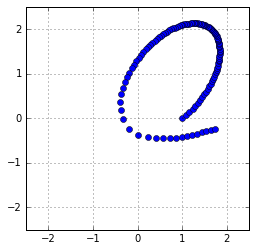

CPU times: user 206 ms, sys: 0 ns, total: 206 ms
Wall time: 205 ms


In [41]:
%%time
t, r_vr = RK_midP(mov_planeta, [1,0,0.9,0.7], [0,1.8*2*pi], 0.1)
zoom = 2.5 
xlim([-zoom, zoom]), ylim([-zoom, zoom])
axes().set_aspect('equal'), grid(True)
plot(r_vr[:,0], r_vr[:,1],'o')
show()

Para usar el metodo de Euler de segundo orden necesitamos definir la matriz Jacobiana, a partir de las ecuaciones:

$$
\frac{d {\rho}_x}{d{\tau}} = v_{\rho x}
$$

$$
\frac{d {\rho}_y}{d{\tau}} = v_{\rho y}
$$

$$
\frac{d v_{\rho x}}{d{\tau}} = - \frac{{\rho}_x}{{\rho}³}
$$

$$
\frac{d v_{\rho y}}{d{\tau}} = - \frac{{\rho}_y}{{\rho}³}
$$

Con lo que obtenemos:

$$
\left( \begin{matrix} 
\frac{\partial {\frac{d {\rho}_x}{d{\tau}}} }{\partial x} = 0 & 
\frac{\partial {\frac{d {\rho}_x}{d{\tau}}} }{\partial y} = 0 &
\frac{\partial {\frac{d {\rho}_x}{d{\tau}}} }{\partial v_{\rho x}} = 1 &
\frac{\partial {\frac{d {\rho}_x}{d{\tau}}} }{\partial v_{\rho y}} = 0 \\
\frac{\partial {\frac{d {\rho}_y}{d{\tau}}} }{\partial x} = 0 & 
\frac{\partial {\frac{d {\rho}_y}{d{\tau}}} }{\partial y} = 0 & 
\frac{\partial {\frac{d {\rho}_y}{d{\tau}}} }{\partial v_{\rho x}} = 0 &
\frac{\partial {\frac{d {\rho}_y}{d{\tau}}} }{\partial v_{\rho y}} = 1 \\
\frac{\partial {\frac{d v_{\rho x}}{d{\tau}}} }{\partial x} = \frac{2 { {\rho}_x }² - { {\rho}_y }² }{{\rho}⁵} & 
\frac{\partial {\frac{d v_{\rho x}}{d{\tau}}} }{\partial y} = \frac{3 {\rho}_x {\rho}_y }{{\rho}⁵} & 
\frac{\partial {\frac{d v_{\rho x}}{d{\tau}}} }{\partial v_{\rho x}} = 0 & 
\frac{\partial {\frac{d v_{\rho x}}{d{\tau}}} }{\partial v_{\rho y}} = 0 \\
\frac{\partial {\frac{d v_{\rho y}}{d{\tau}}} }{\partial x} = \frac{3 {\rho}_x {\rho}_y }{{\rho}⁵} &
\frac{\partial {\frac{d v_{\rho y}}{d{\tau}}} }{\partial y} = \frac{2 { {\rho}_y }² - { {\rho}_x }² }{{\rho}⁵} & 
\frac{\partial {\frac{d v_{\rho y}}{d{\tau}}} }{\partial v_{\rho x}} = 0 & 
\frac{\partial {\frac{d v_{\rho y}}{d{\tau}}} }{\partial v_{\rho y}} = 0 
\end{matrix} \right)
$$

In [36]:
def J_mov_planeta(x,t):
    d_ec = array([0,0,0,0])
    r5 = (x[0]**2 + x[1]**2)**2.5
    rxmry = (2*x[0]**2 - x[1]**2)/r5
    rymrx = (2*x[1]**2 - x[0]**2)/r5
    rxry = (3*x[0]*x[1])/r5
    Jac = array([[0,0,1,0],[0,0,0,1],[rxmry, rxry, 0, 0], [rxry, rymrx, 0, 0]])
    return d_ec, Jac

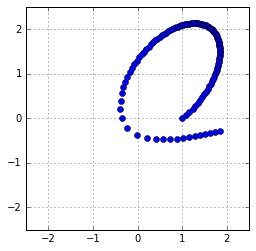

CPU times: user 210 ms, sys: 0 ns, total: 210 ms
Wall time: 210 ms


In [43]:
%%time
t, r_vr = integra2(mov_planeta, J_mov_planeta, [1,0,0.9,0.7], [0,1.8*2*pi], 0.1)
zoom = 2.5 
xlim([-zoom, zoom]), ylim([-zoom, zoom])
axes().set_aspect('equal'), grid(True)
plot(r_vr[:,0], r_vr[:,1],'o')
show()

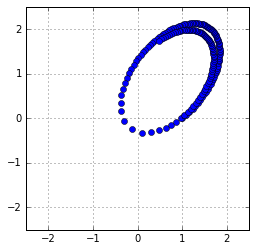

CPU times: user 206 ms, sys: 7.99 ms, total: 214 ms
Wall time: 217 ms


In [58]:
%%time
t, r_vr = RK_4(mov_planeta, [1,0,0.9,0.7], [0,2.8*2*pi], 0.1)
zoom = 2.5 
xlim([-zoom, zoom]), ylim([-zoom, zoom])
axes().set_aspect('equal'), grid(True)
plot(r_vr[:,0], r_vr[:,1],'o')
show()

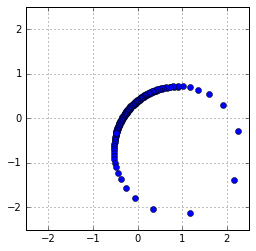

In [60]:
zoom = 2.5 
xlim([-zoom, zoom]), ylim([-zoom, zoom])
axes().set_aspect('equal'), grid(True)
plot(r_vr[:,2], r_vr[:,3],'o')
show()

In [45]:
from scipy.integrate import *

In [54]:
h = 0.1
tiempos = arange(0, 2.8*2*pi+h, h)

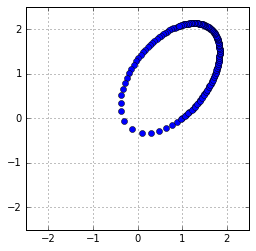

CPU times: user 212 ms, sys: 0 ns, total: 212 ms
Wall time: 211 ms


In [55]:
%%time
r_vr = odeint(mov_planeta, [1,0,0.9,0.7], tiempos)
zoom = 2.5 
xlim([-zoom, zoom]), ylim([-zoom, zoom])
axes().set_aspect('equal'), grid(True)
plot(r_vr[:,0], r_vr[:,1],'o')
show()

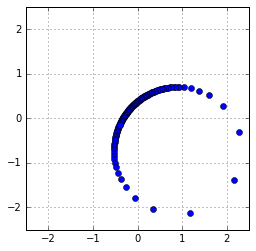

In [56]:
zoom = 2.5 
xlim([-zoom, zoom]), ylim([-zoom, zoom])
axes().set_aspect('equal'), grid(True)
plot(r_vr[:,2], r_vr[:,3],'o')
show()